# Naive Bayes

## Introduction

We will start by working on the Iris dataset. Recall that Iris dataset contains iris species and sepal and petal measurements. We will quickly explore the dataset and jump into Naive Bayes.

In [23]:
from __future__ import print_function
import os
#Data Path has to be set as per the file location in your system
#data_path = ['..', 'data']
data_path = ['data']

In [2]:
# !wget https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

In [3]:
# os.rename("iris.data", os.sep.join(data_path + ["iris.csv"]))

## Question 1

* Load the Iris dataset.
* Take a quick look at the data types.
* Look at the skew values and decide if any transformations need to be applied. You can use skew value 0.75 as a threshold.
* Use `sns.pairplot` to plot the pairwise correlations and histograms. Use `hue="species"` as a keyword argument in order to see the distribution of species.

In [4]:
import pandas as pd
import numpy as np
#The filepath is dependent on the data_path set in the previous cell 
filepath = os.sep.join(data_path + ['iris.csv'])
data = pd.read_csv(filepath, sep=',', header=0)

In [5]:
data.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

Notice that aside from the predictor variable, everything is float.

In [6]:
skew = pd.DataFrame(data.skew())

Fields are not too badly skewed.

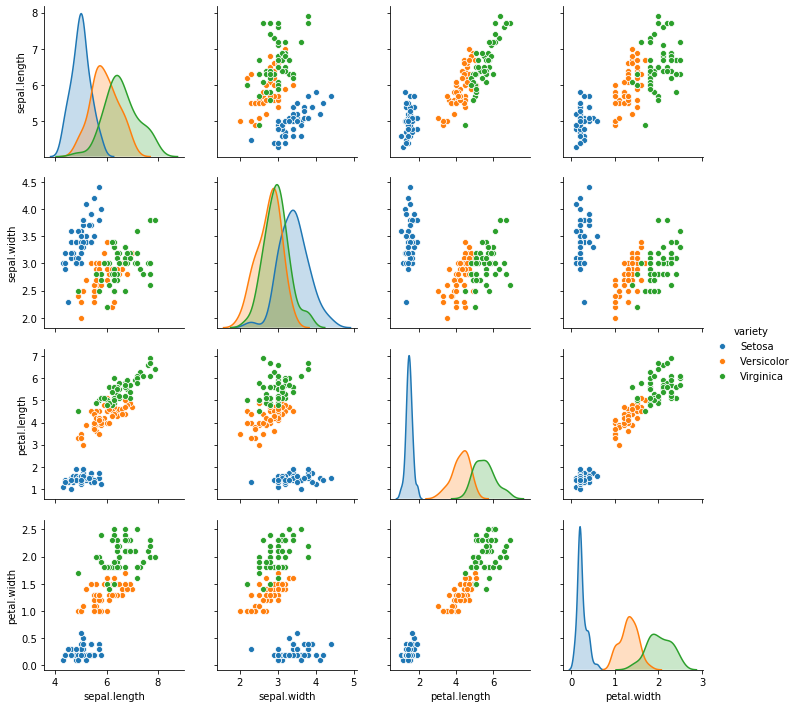

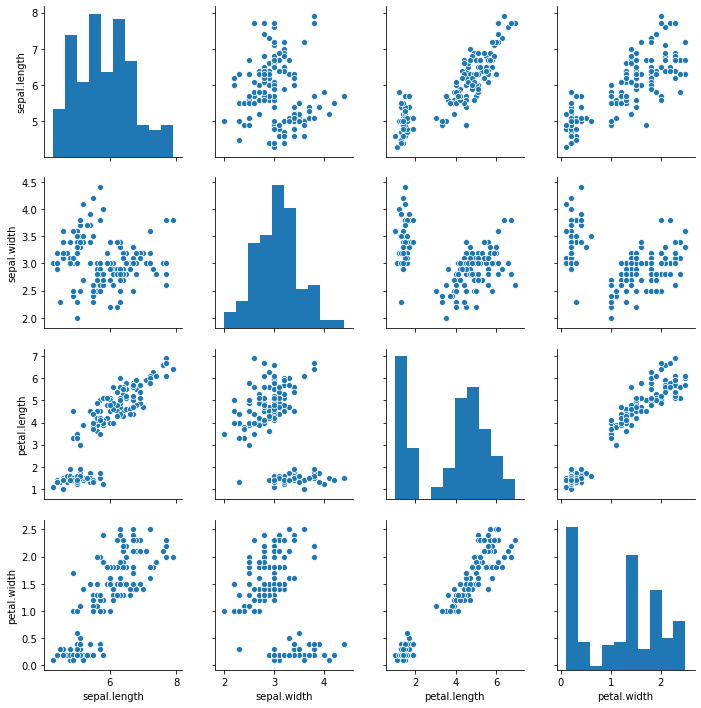

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(data, hue='variety')
sns.pairplot(data)

## Question 2

Let's now fit a Naive Bayes classifier to this data in order to predict "species".

* Pick the appropriate type of Naive Bayes given the nature of your dataset (data types of columns). Recall, choices are
    * GaussianNB
    * MultinomialNB
    * BernoulliNB
* Use `cross_val_score` to see how well your choice works.

In [8]:
features=data.iloc[:, 0:3]
target=data["variety"]

In [9]:
# Since the features are continuous, the right choice is GaussianNB

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

gaussian=GaussianNB().fit(features, target)

print("CV:", cross_val_score(gaussian, features, target, cv=3))

CV: [0.8627451  0.88235294 0.9375    ]


## Question 3:

Now let's try all types of Naive Bayes and observe what happens

* Compare the cross validation scores for Gaussian, Bernouilli and Multinomial Naive Bayes.
* Why is BernoulliNB performing like it does?

In [10]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [11]:
bernoulli=BernoulliNB().fit(features, target)
multinomial=MultinomialNB().fit(features, target)

In [12]:
print("Model\t\t\t Accuracy\t\t Cross Validation Score (3)")
print("Gaussian\t:\t", gaussian.score(features, target)*100, "\t\t\t",cross_val_score(gaussian, features, target, cv=3))
print("Bernoulli\t:\t", bernoulli.score(features, target)*100, "\t", cross_val_score(bernoulli, features, target, cv=3))
print("Multinomial\t:\t", multinomial.score(features, target)*100, "\t", cross_val_score(multinomial, features, target, cv=3))

Model			 Accuracy		 Cross Validation Score (3)
Gaussian	:	 88.0 			 [0.8627451  0.88235294 0.9375    ]
Bernoulli	:	 33.33333333333333 	 [0.33333333 0.33333333 0.33333333]
Multinomial	:	 95.33333333333334 	 [0.98039216 0.94117647 0.9375    ]


Looks like BernoulliNB results are very bad, but MultinomialNB is doing a very good job.

Why are the results of Bernoulli bad? Find out the reason.

## Question 4:

Let's see what happens when we take away the predictive features.

* Check the pairplot histograms (diagonal) you produced above and identify the two most predictive features visually.
* Remove the *petal_* features which are very predictive, and re-do the comparison above. That is, get the cross validation scores for all types of Naive Bayes.

In [13]:
X = features
y = target

nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}

print("Model\t\t\t Accuracy\t Cross Validation Score (3)")

cvScores=pd.DataFrame()

# Try other variants on the lines shown in the previous cell for GaussianNB and compare the results on scoring = 'accuracy'. 
# Run the piece of code as shown in array in question 3
for naive, model in nb.items():
    model.fit(X, y)
    print(naive,"\t:\t", round(model.score(features, target)*100, 2), "\t\t", cross_val_score(model, features, target, cv=3))
    cvScores[naive]=cross_val_score(model, features, target, cv=3)

Model			 Accuracy	 Cross Validation Score (3)
gaussian 	:	 88.0 		 [0.8627451  0.88235294 0.9375    ]
bernoulli 	:	 33.33 		 [0.33333333 0.33333333 0.33333333]
multinomial 	:	 95.33 		 [0.98039216 0.94117647 0.9375    ]


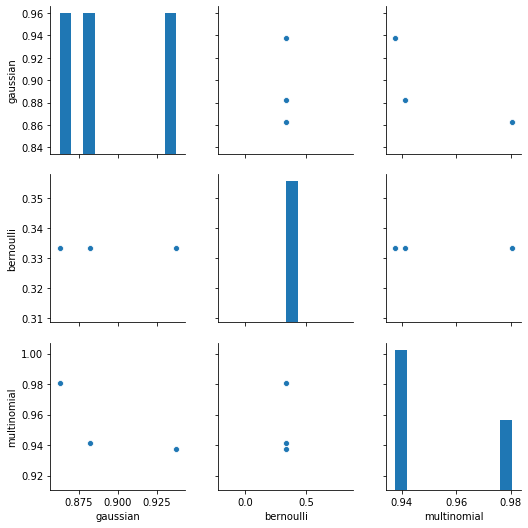

In [14]:
sns.pairplot(cvScores)

#Come up with your observations after taking away the very predictive features, which model works better

## Question 5

This question explores how Naive Bayes algorithms can be affected when we push the underlying (naive) assumption too much. Recall that the naive assumption is that the features in the training set are *independent* from each other.

* Create **0, 1, 3, 5, 10, 50, 100** copies of `sepal_length` and fit a `GaussianNB` for each one.
* Keep track of the save the average `cross_val_score`.
* Create a plot of the saved scores over the number of copies.

In [15]:
# X = data[data.columns[:-1]] # only sepal_length
X = data["sepal.length"]
y = data["variety"]

numCopies=[0, 1, 3, 5, 10, 50, 100]
cvScores=[]

for k in numCopies:
    gaussian=GaussianNB()
    
    if k!=0:
        X=np.tile(X, k)
        y=np.tile(y, k)
    cvScores.append(np.mean(cross_val_score(gaussian, np.array(X).reshape(-1, 1), y, cv=3)))
    print(cvScores[-1])

0.7197712418300654
0.7197712418300654
0.7266666666666667
0.7266666666666667
0.7266666666666667
0.7266666666666667
0.7266666666666667


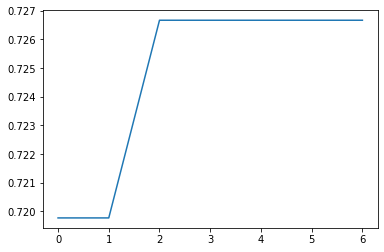

In [19]:
plt.plot(cvScores)

## Question 6 - Naive Bayes on Human Activity Recongnition

In this question, we'll explore discretizing the dataset and then fitting MultinomialNB.  

* Load the Human Activity Recognition dataset. 
* Look at the data types. It's all continuous except for the target.
* Create `X` and `y` from `data`. `y` is the "Activity" column.
* Create training and test splits.
* Fit a GaussianNB to the training split.
* Get predictions on the test set.
* use `sns.heatmap` to plot the confusion matrix for predictions.

In [24]:
filepath= os.sep.join(data_path + ["Human_Activity_Recognition_Using_Smartphones_Data.csv"])
#The filepath is dependent on the data_path set in the previous cell

data = pd.read_csv(filepath, sep=',')
print(data.dtypes.value_counts())

float64    561
object       1
dtype: int64


In [25]:
data.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING


In [26]:
data.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
Length: 562, dtype: object

In [32]:
from sklearn.preprocessing import LabelEncoder

y=data["Activity"]
X=data.drop("Activity", axis=1)

y=LabelEncoder().fit_transform(y)

print(np.random.choice(y, 5))
X.head(2)

[2 1 1 3 5]


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [34]:
gaussian=GaussianNB().fit(X_train, y_train)
y_pred=gaussian.predict(X_test)

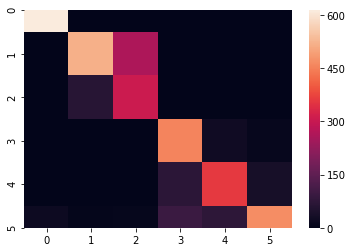

In [35]:
from sklearn.metrics import confusion_matrix

confusion_mat=confusion_matrix(y_pred, y_test)
sns.heatmap(confusion_mat)

## Question 7

Now, let's discretize the dataset from Question 6. There are many ways to do this, but we'll use `pd.DataFrame.rank(pct=True)`.

a. Create `X_discrete` from `X` using .rank(pct=True)

b. Look at the values. They are still not discrete. Modify `X_discrete` so that it is indeed discrete. (Hint: try to get the first 2 digits using `.applymap`)

c. Split `X_discrete` and `y` into training and test datasets

d. Fit a MultinomialNB to the training split.

e. Get predictions on the test set.

f. Plot the confusion matrix for predictions.

In [40]:
X_discrete=X.rank(pct=True)
X_discrete=X_discrete.round(2)
X_discrete.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.75,0.34,0.16,0.15,0.19,0.46,0.19,0.19,0.45,0.27,...,0.19,0.55,0.49,0.26,0.53,0.26,0.49,0.19,0.5,0.35
1,0.57,0.56,0.23,0.02,0.26,0.37,0.01,0.27,0.38,0.04,...,0.54,0.18,0.21,0.62,0.48,0.17,0.92,0.18,0.5,0.36


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_discrete, y, test_size=0.33)

In [42]:
gaussian=GaussianNB().fit(X_train, y_train)
y_pred=gaussian.predict(X_test)

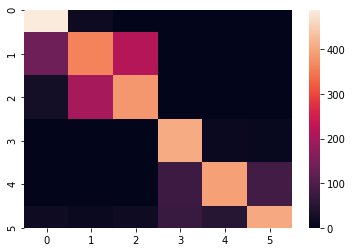

In [43]:
confusion_mat=confusion_matrix(y_pred, y_test)
sns.heatmap(confusion_mat)